# Interview Prep: Data Structures and Algorithms

In [148]:
import math
import random
import time
from tqdm.notebook import tqdm

import heapq
from collections import defaultdict, Counter, deque
from bisect import bisect_left

import matplotlib.pyplot as plt
from copy import deepcopy

random.seed(123)

## Basic Data Structures

### Strings

- Strings in python are *immutable*, meaning they can't be modified. Must be converted to a list first.
- Note: Using a counter on a fixed size vocabulary runs in $O(n)$ time, but $O(1)$ space.

In [156]:
# reverse a string in place
# easy way: return string[::-1]
def reverse_string(string):
    string = list(string)
    n = len(string)
    for i in range(n // 2):
        string[i], string[n-i-1] = string[n-i-1], string[i]
    return ''.join(string)

reverse_string('abc')

'cba'

In [183]:
# determine if a string is a palindrome
# easy way: return list(string) == list(reversed(string))
# example: 'abccba' -> True
def valid_palindrome(string):
    n = len(string)
    for i in range(n // 2):
        if string[i] != string[n-i-1]:
            return False
    return True

valid_palindrome('abccba')

True

In [164]:
# find the most frequently occuring character in a string
def most_freq(string):
    from collections import Counter
    counter = Counter(string)
    return counter.most_common(1)[0][0]
    
most_freq('aaabbcc')

'a'

In [171]:
# find all n-grams of a given string, given a particular n
# example: 'the quick brown fox' n=2 -> ['the quick', 'quick brown', 'brown fox']
def n_grams(string, n):
    words = string.split(' ')
    ngrams = [words[i:i+n] for i in range(len(words) - n + 1)]
    return ngrams

n_grams('the quick brown fox', 2)

[['the', 'quick'], ['quick', 'brown'], ['brown', 'fox']]

In [186]:
# determine if two given strings are anagrams of each other
# example: 'abc' and 'bac' -> True
def valid_anagrams_sorting(string_1, string_2):
    # O(n*log(n)) time and O(1) space
    return sorted(string_1) == sorted(string_2)

def valid_anagrams_counter(string_1, string_2):
    # O(n) time and O(1) space
    from collections import Counter
    counter_1 = Counter(string_1)
    counter_2 = Counter(string_2)
    return counter_1 == counter_2

valid_anagrams_counter('abc', 'bac')

True

## Binary Search

- Naively searching an array for a value in a for loop runs in $O(n)$ time. This is linear search.
- The python `value in array` version of search runs in linear time.
- Binary search can find the value in a *sorted* array in $O(\log n)$ time.
- Can use the standard library `bisect.bisect_left` function to do vanilla binary search in python.
- Many problems can be reduced to a form of binary search.
    - Suppose you have a sorted array and a target, and that you can map a problem to a mask condition mask(array, target). Then the problem of finding the *boundary* of the mask is equivalent to binary search.
    - For these problems, it may be easier filling in the mask template first, and then filling in what the mask is.

In [2]:
def linear_search(array, value):
    for i in range(len(array)):
        if value == array[i]:
            return i
    return -1

def binary_search(array, value):
    """return idx of value in array, else -1"""
    first, last = 0, len(array) - 1
    idx = -1
    while first <= last:
        mid = (first + last) // 2
        if value <= array[mid]:
            idx = mid
            last = mid - 1
        if value > array[mid]:
            first = mid + 1
    return idx

def binary_search_mask(mask):
    """returns idx of mask boundary, else -1
    example: mask=[False, False, True, True] -> idx=2
    this template can be used to solve many problems given a mask"""
    first = 0
    last = len(mask) - 1
    idx = -1
    while first <= last:
        mid = (first + last) // 2
        if mask[mid]:
            idx = mid
            last = mid - 1
        else:
            first = mid + 1
    return idx

In [3]:
array = list(range(5, 100_000))
value = 50_000

In [4]:
%timeit linear_search(array, value)

1.35 ms ± 6.51 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
%timeit binary_search(array, value)

1.57 µs ± 8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [6]:
%timeit (value in array)

277 µs ± 968 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
%timeit bisect_left(array, value)

221 ns ± 1.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Sorting

- Naive sorting algorithms generally run in worst case $O(n^2)$ time.
- The best proven possible worst case running time for arrays of *arbitrary objects* is $O(n\log n)$.
- A sorting algorithm is **in-place** if the sort is done inside the same array, without copying to a new array.
- A sorting algorithm is **stable** if it preserves the order of objects of the same sorting rank.
- In Python:
    - In-place sorting can be done with `array.sort`.
    - To copy a sort to a *new* array, use `sorted(array)`. This will be slower than in-place.
- Python's default sorting uses a variation of quick sort for mostly unsorted arrays, and insertion sort for mostly sorted arrays.
- Probably the 3 most important sorting algorithms to know about are:
    - **Merge sort:** Uses a divide and conquer strategy to sort. Worst case is $O(n\log n)$ time. Memory inefficient.
    - **Quick sort:** Uses a random pivot to split and sort recursively. Worst case is $O(n^2)$ time, but the *average* case is $O(n\log n)$ time. More memory efficient and practical, unless array is almost sorted.
    - **Insertion sort:** Moving from left to right in array, iteratively takes the next value and inserts it to its sorted spot in the left, sorted piece. Worst case is $O(n^2)$ time, but is $O(1)$ time for almost sorted arrays.

In [8]:
def merge_sort(array):
    def merge(left, right):
        i = j = 0
        array = []
        while i + j < len(left) + len(right):
            if j == len(right) or (i < len(left) and left[i] < right[j]):
                array.append(left[i])
                i += 1
            else:
                array.append(right[j])
                j += 1
        return array
    
    # base case: don't sort if not needed
    if len(array) <= 1:
        return array
    # recursion: split array in half recursively
    mid = len(array) // 2
    left = merge_sort(array[:mid])
    right = merge_sort(array[mid:])
    # merge sorted results back together
    merged = merge(left, right)
    return merged

def quick_sort(array):
    # base case: don't sort if not needed
    if len(array) <= 1:
        return array
    # recursion: split into subarrays based on random pivot and recurse
    pivot = random.choice(array)
    left, equal, right = [], [], []
    for value in array:
        if value < pivot:
            left.append(value)
        elif value == pivot:
            equal.append(value)
        elif value > pivot:
            right.append(value)
    left = quick_sort(left)
    right = quick_sort(right)
    # merge sorted results back together
    merged = left + equal + right
    return merged

def insertion_sort(array):
    # iterate through array left to right
    for i in range(len(array)):
        j = i
        # bubble array[i] down to its sorted place in array[:i+1]
        while j > 0 and array[j] < array[j-1]:
            # swap current and previous elements if out of order
            array[j], array[j-1] = array[j-1], array[j]
            j -= 1
    return array

In [9]:
array = list(range(10_000))
random.shuffle(array)

In [10]:
%timeit sorted(array)

777 µs ± 2.74 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
random.shuffle(array)

In [12]:
%timeit array.sort()

24.5 µs ± 81.5 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
random.shuffle(array)

In [14]:
%timeit merge_sort(array)

26.5 ms ± 72.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
random.shuffle(array)

In [16]:
%timeit quick_sort(array)

11.6 ms ± 66.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
random.shuffle(array)

In [18]:
%timeit insertion_sort(array)

568 µs ± 7.55 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Recursion

- The process of a function calling itself until terminating according to some base case.
- The programming analogue of proof by induction. You need *both* a base case and a recursive relation.
- In memory, recursion is stored using a **stack frame**. Each element in the stack is a particular recursive call.
- Failing to have a proper base case the recursion is guaranteed to hit will result in a **stack overflow**, where the program runs out of memory.
- Can often visualize recursion with a tree.
    - Example: 
    ```
    factorial(5) - factorial(4) - factorial(3) - factorial(2) - factorial(1)
    ```
    - Example:
    ```
    fibonacci(3) - fibonacci(2) - fibonacci(1)
                   |              - fibonacci(0)
                   - fibonacci(1)
    ```
- Not always a good idea to use *in practice* in Python because of the lack of tail-call optimization, but it *is* useful for having a simpler implementation of some types of interview questions.
- Any recursive algorithm can be unrolled into an iterative algorithm, and vice versa.

In [19]:
def factorial(n):
    # O(n) time without memoization
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)
    
def fibonacci(n):
    # O(n!) time without memoization
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

In [20]:
fibonacci(10)

55

## Trees

- A **tree** is a data structure of **nodes** connected by **edges**, where there is exactly one incoming edge from a **parent node**, and one or more outgoing edges to **child nodes**. The node with no parent is called the **root**. Nodes with no children are called the **leaves**. The number of levels in the tree is called its **depth**. Any nodes above a given node is called its **ancestors**, and any nodes below it are its **descendents**.
<img src=https://algomonster.s3.us-east-2.amazonaws.com/tree_intro/tree_intro.001.png width=500>
- The nodes generally are values of some kind, and the edges are pointers connecting those values.
- A tree cannot have cycles or loops, and must have one unique root.
- A **binary tree** is a tree in which each node has no more than 2 children. An **n-ary tree** is a tree in which each node has no more than $n$ children.
- A binary tree is **balanced** if the height difference of the left and right subtree of any given node in the tree is never more than one.
- In a balanced binary tree, the height of the tree is $O(\log n)$. Otherwise it's $O(n)$.
- In a **full** binary tree, there are $O(n)$ leaf nodes.
- A **binary search tree** or **BST** is a binary tree satisfying the property that for any node, any left descendants are always less in value than any right descendants.
- Searching, insertion, and deletion in a balanced BST take $O(\log n)$ time, and $O(n)$ time if the BST is unbalanced.

In [21]:
class BinaryTreeNode:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
        
    def __repr__(self):
        return f'BinaryTreeNode({self.value}, left={self.left}, right={self.right})'
    
    def print_tree(self, level=0):
        indent = '   '
        if self is not None:
            current_level = level
            if self.left is not None:
                self.left.print_tree(current_level + 1)
            print(f'{indent * current_level} {self.value}')
            if self.right is not None:
                self.right.print_tree(current_level + 1)
        
class NaryTreeNode:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children
        
    def __repr__(self):
        return f'NaryTreeNode({self.value}, children={[node for node in self.children]})'
    
    def print_tree(self, level=0):
        indent = '   '
        if self is not None:
            current_level = level
            print(f'{indent * current_level} {self.value}')
            for child in self.children:
                child.print_tree(current_level + 1)

In [22]:
root = BinaryTreeNode(1, left=BinaryTreeNode(2, left=BinaryTreeNode(4)), right=BinaryTreeNode(3))
root

BinaryTreeNode(1, left=BinaryTreeNode(2, left=BinaryTreeNode(4, left=None, right=None), right=None), right=BinaryTreeNode(3, left=None, right=None))

In [23]:
root.print_tree()

       4
    2
 1
    3


In [24]:
root = NaryTreeNode(1, children=[NaryTreeNode(2, children=[NaryTreeNode(4)]), NaryTreeNode(3)])
root

NaryTreeNode(1, children=[NaryTreeNode(2, children=[NaryTreeNode(4, children=[])]), NaryTreeNode(3, children=[])])

In [25]:
root.print_tree()

 1
    2
       4
    3


### Tree Traversals

- There are 3 common ways to traverse the nodes in a binary tree: pre-order, in-order, and post-order traversal.
- **Pre-order traversal** visits the current node first, then the left subtree, and finally the right subtree.
- **In-order traversal** visits the left branch first, then the current node, and finally the right branch.
- **Post-order traversal** visits the left subtree first, then the right subtree, and finally the current node.
- Traversals can be used to search trees, as well as build them from a list of nodes.
- Since every subtree of a given node gets traversed, all traversals run in $O(n)$ time.

In [26]:
def tree_traversal(node, order='in-order'):
    """return a list of the values in a tree in traversed order"""
    def in_order_traversal(node):
        if node is not None:
            in_order_traversal(node.left)
            values.append(node.value)
            in_order_traversal(node.right)
    def pre_order_traversal(node):
        if node is not None:
            values.append(node.value)
            pre_order_traversal(node.left)
            pre_order_traversal(node.right)
    def post_order_traversal(node):
        if node is not None:
            post_order_traversal(node.left)
            post_order_traversal(node.right)
            values.append(node.value)   
    values = []
    if order == 'in-order':
        in_order_traversal(node)
    elif order == 'pre-order':
        pre_order_traversal(node)
    elif order == 'post-order':
        post_order_traversal(node)
    return values

In [27]:
root = BinaryTreeNode(1, 
    left=BinaryTreeNode(2, left=BinaryTreeNode(4), right=BinaryTreeNode(5)), 
    right=BinaryTreeNode(3, left=BinaryTreeNode(6), right=BinaryTreeNode(7))
)

In [28]:
tree_traversal(root, order='in-order')

[4, 2, 5, 1, 6, 3, 7]

In [29]:
tree_traversal(root, order='pre-order')

[1, 2, 4, 5, 3, 6, 7]

In [30]:
tree_traversal(root, order='post-order')

[4, 5, 2, 6, 7, 3, 1]

### Depth First Search

- **Depth first search** or **DFS** uses a *pre-order traversal* to search the tree in a depth first fashion from left to right.
- It's usually easiest to code DFS up using left to right recursion on the subtrees of the root. This is a *divide and conquer* approach, since it recursively divides a node into its subtrees until it hits the leaves or finds the target.
- DFS is one of the most important algorithms to know by heart for coding interviews since it comes up a lot, often disguised as **backtracking**, which is basically the same thing. Tree search comes up in these types of problems:
    - Any tree traversal problem (finding a node, detect balanced BST, max subtree).
    - Combinatorial problems (how many ways to, find all possible combinations, find all solutions to).
    - Searching graphs with no cycles (path between 2 nodes, cycle detection, find connected components).
- Keys to tree problems: 
    - Think from the perspective of a node. All you can do is look at your value and your children. Figure out how to recurse on that information.
    - What do we want to return after visiting a node? Use the return value to pass information from children to parent.
    - What states (i.e. function arguments) do we need to maintain to compute the return value for the current node. Use states to pass information from parent to children.
    - There are two ways to keep track of global information in a tree: return values, and global variables. Return values are usually easier for simpler problems, and global variables for more complex problems.

In [31]:
def dfs(root, target):
    if root is None:
        return None
    if root.value == target:
        return root
    return dfs(root.left, target) or dfs(root.right, target)

In [32]:
root = BinaryTreeNode(1, 
    left=BinaryTreeNode(2, left=BinaryTreeNode(4), right=BinaryTreeNode(5)), 
    right=BinaryTreeNode(3, left=BinaryTreeNode(6), right=BinaryTreeNode(7))
)

In [33]:
root.print_tree()

       4
    2
       5
 1
       6
    3
       7


In [34]:
dfs(root, 7)

BinaryTreeNode(7, left=None, right=None)

### Binary Search Trees (BSTs)

- A **BST** is a binary tree with the value of each internal node being greater than all the values in the respective node's left subtree and less than the ones in its right subtree.
- Some kind of ordering is assumed on the nodes, be it numerical or dictionary or whatever else.
- An in-order traversal of a BST will always return values in sorted order.
- An empty binary tree is trivially a BST.
- Given a BST with $n$ nodes and height $h$, search can be performed in $O(h)$ time. If the tree is balanced, $h=O(\log n)$. If not, $h=O(n)$.
- One advantage of a BST compared to a sorted list is that inserting an item into the BST doesn't require each item in the list to move down an index, like inserting to a sorted list would do. 
- Insertion, deletion, and search in a BST is $O(h)$, usually $O(\log n)$.
- If insertions and deletions to a BST are frequent, a balanced BST can become unbalanced over time, resulting in degraded performance. In such cases it's helpful to **rebalance** the BST so that it again has $h=O(\log n)$.
- Examples of **self-balancing** BSTs are **AVL trees** and **R/B Trees**. These trees keep themselves balanced dynamically with every insert/delete operation.
- Since most languages dynamically resize arrays now, insertions and deletions are *amortized* $O(1)$ time, making BSTs less practically useful relative to lists or dictionaries.
- When to use a BST vs a sorted list:
    - You're doing a lot of insertions or deletions. These are $O(\log n)$ for a balanced BST but $O(n)$ for a sorted array (unless the arrays are dynamically resized).
    - Maintaining sorted order while doing insertions or deletions is very important. Dictionaries aren't generally in sorted order.
    - Finding the first value in a sorted list *greater* than some given value is easier using a BST.
    - Finding the $k$th largest or smallest values in a list is easier with a BST.
    - Memory usage is lower for BSTs than dictionaries. So if memory usage is very important, BSTs could be more useful.

In [35]:
def valid_bst(root):
    """Check if a binary tree is in proper in-order sorted order"""
    nodes = []
    def recurse(node):
        if node is not None:
            left = recurse(node.left)
            nodes.append(node)
            right = recurse(node.right)
    recurse(root)
    for i in range(1, len(nodes)):
        if not nodes[i-1].value <= nodes[i].value:
            return False
    return True

def bst_search(node, value):
    """Given a valid BST, return True if value is in BST, else False"""
    if node is None:
        return False
    elif node.value == value:
        return True
    elif value < node.value:
        return bst_search(node.left, value)
    else:
        return bst_search(node.right, value)
    
def bst_insert(node, value):
    """Given a valid BST, insert value in sorted place and return new BST"""
    if node is None:
        return BinaryTreeNode(value)
    elif value <= node.value:
        node.left = bst_insert(node.left, value)
    elif value > node.value:
        node.right = bst_insert(node.right, value)
    return node

## Backtracking

### Combinatorial Search

- Combinatorial search problems involve finding groupings and assignments of objects that satisfy certain conditions.
- Examples include finding all permutations, finding all subsets, solving sudoku, and the 8 queens problem.
- The **permutations** of a list are the different possible orderings of that list.
    - Example: `abc` has permutations `abc`, `acb`, `bca`, `bac`, `cab`, `cba`. That's $3!=6$ total.
    - For a list with $n$ elements, there are $n!$ permutations of that list.
    - Permutations can be thought of as a tree. For example, the above example has the following tree:
    <img src=https://algomonster.s3.us-east-2.amazonaws.com/dfs_intro/arrangement.png width=500>
- Combinatorial problems very often are $O(2^n)$ or $O(n!)$ time, making them very slow to brute force. This is called combinatorial explosion.
- The search space of combinatorial problems can be represented with a **state-space tree**. Each node in the tree represents a possible reachable state in the search problem. The leaf nodes are the solutions to the problem.
- Combinatorial search problems boil down to DFS/backtracking on the state-space tree.
- These trees can get very large, so pruning often has to be done.
- To solve combinatorial search problems:
    1. Identify the states.
        - What do we need to keep track of to find the solution?
        - How do we decide which child nodes should be visited next?
        - How do we decide which nodes to prune?
    2. Draw the state-space tree.
        - Physically draw out the state space on paper. Don't skip this step!
        - Test on a small example, all the way down to the leaf nodes.
    3. DFS/backtrack on the state-space tree.
        - Apply the following backtracking template to traverse the tree with DFS and solve.
- Backtracking template:
```python
def search(node, state):
    if state is a solution:
        report(state) # e.g. add state to final result list
        return
    for child in children:
        if child is a part of a potential solution: # pruning the tree
            state.append(child) # make move
            search(child, state)
            state.remove(child) # backtrack
```
- Tip: When coding the search problem, first pretend you're working with a tree node object. Once you have code that looks good that way, change it to work with whatever the problem calls for instead.

In [36]:
def find_permutations(letters):
    # factorial time recursion algorithm...only works up to like 10 letters
    permutations = []
    def recurse(remaining=[], path=[]):
        if len(path) == len(letters):
            permutations.append(''.join(path))
        else:
            for idx in range(len(remaining)):
                recurse(remaining=remaining[:idx]+remaining[idx+1:], path=path+[remaining[idx]])
    recurse(remaining=list(letters))
    return permutations

find_permutations('abc')

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

  0%|          | 0/10 [00:00<?, ?it/s]

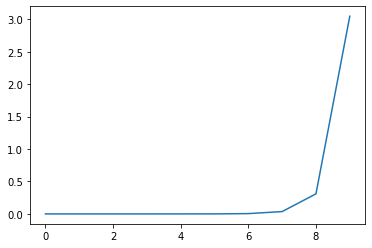

In [37]:
# letters = ''
# times = []
# for i in tqdm(range(10)):
#     letters += str(i)
#     result = %timeit -n1 -r1 -o -q find_permutations(letters)
#     times.append(result.average)
# plt.plot(times)

In [72]:
def phone_num_letters(digits):
    def recurse(path=[]):
        if len(path) == len(digits):
            combinations.append(''.join(path))
        else:
            digit = digits[len(path)]
            for letter in phone_dict[digit]:
                path.append(letter)
                recurse(path)
                path.pop()
    
    phone_dict = {'2': 'ABC', '3': 'DEF', '4': 'GHI', '5': 'JKL', '6': 'MNO', '7': 'PQRS', '8': 'TUV', '9': 'WXYZ'}
    combinations = []
    recurse()
    return combinations

#                    ''
# 5:    'J'         'K'         'L'
# 6: 'M' 'N' 'O' 'M' 'N' 'O' 'M' 'N' 'O'
# levels = [[''], ['J', 'K', 'L'], ['M', 'N', 'O'] * 3]

phone_num_letters('56')

['JM', 'JN', 'JO', 'KM', 'KN', 'KO', 'LM', 'LN', 'LO']

### Memoization and Pruning

- Memoization is the act of saving the previous function call result in a dictionary (called a **memo**) and reading from it when we do the exact same call again.
- Reading from the memo dictionary keeps us from having to calculate the same result again, which helps **prune** the state space tree, making it much more tractable in many cases.
- Memoization is particularly useful for combinatorial problems that have large repeated state-space tree branches.
- A classic example is calculating the Fibonacci numbers recursively. Without using memoization, such a problem is exponential time since $F_n \sim \phi^n$, but with memoization the problem becomes just $O(n)$.

<img src=https://algomonster.s3.us-east-2.amazonaws.com/fib.001.png width=500>

In [90]:
def fibonacci(n, fibs={}):
    if n in fibs:
        return fibs[n]
    elif n == 0 or n == 1:
        fibs[n] = n
        return fibs[n]
    else:
        fibs[n] = fibonacci(n-1, fibs) + fibonacci(n-2, fibs)
        return fibs[n]
        
fibonacci(6)

8

In [134]:
# Given a set of distinct values, return all possible subsets (the power set).
# start with empty set, grow from first digit to last depending on split
# level L = Lth element of the array
# splits at L: is element L in set (always binary)
def subsets(array):
    def recurse(path=[], i=0):
        if i == len(array):
            powerset.append(path)
        else:
            x = array[i]
            recurse(path + [x], i=i+1)
            recurse(path, i=i+1)
    
    powerset = []
    recurse()
    return powerset

subsets([1,2,3])

[[1, 2, 3], [1, 2], [1, 3], [1], [2, 3], [2], [3], []]

## Two-Pointer Problems

- The idea of solving array iteration type problems using two moving indices, called pointers. Also can be used for any other iterable data structure, e.g. strings or linked lists.
- In most cases, solving such problems will be $O(n^2)$ to brute force, but reduce to $O(n)$ using two-pointer methods.
- General characteristics of two-pointer problems:
    - Two moving pointers, regardless of directions, moving dependently or independently.
    - A function that utilizes the entries referenced by the two pointers, which relates to the answer in a way.
    - An easy way of deciding which pointer to move.
    - A way to process the array when the pointers are moved.
- Two-pointer problems can often be classified into the following types:
    - Same direction: The two pointers move in the same direction across the array.
    - Opposite direction: The two pointers move in opposite directions across the array.
    - Sliding windows: A sliding window (usually of fixed size) is moved across the array. Some operation is performed on the entire sliding window as it moves across.

In [38]:
# Remove duplicates from sorted list and return the new length *in-place*
# O(n) time and O(1) space
def remove_duplicates(array):
    start = 0
    for end in range(len(array)):
        if array[start] != array[end]:
            start += 1
            array[start] = array[end]
    length = start + 1
    return array[:length]

array = [1, 2, 2, 3, 4, 5, 5, 6]
remove_duplicates(array)

[1, 2, 3, 4, 5, 6]

**Linked List**

- A simple data structure of nodes connected in linear succession to each other:
$$\text{Node(value}=v_1) \rightarrow \text{Node(value}=v_2) \rightarrow \cdots \rightarrow \text{Node(value}=v_n).$$
- Each node has a value and a pointer to the next node in the list.
- There's no way to index into a linked list, nor return its length without traversing the list.
- Other variants of linked lists add more functionality:
    - A doubly linked list allows pointers in both directions, allowing traversal from either end.
    - A circular linked list wraps back onto itself, with the last node pointing to the first node.

In [39]:
class Node:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next
        
    def __str__(self):
        return f'Node({self.value}, {str(self.next)})'
    
    __repr__ = __str__

head = Node(value=1, next=Node(value=2, next=Node(value=3, next=Node(value=4, next=Node(value=5)))))
head

Node(1, Node(2, Node(3, Node(4, Node(5, None)))))

In [40]:
def middle_of_linked_list(head):
    # find and return the middle node to a linked list
    slow = fast = head
    # traverse fast pointer by skipping steps, slow one at a time -> slow gives midpoint
    while fast and fast.next:
        fast = fast.next.next
        slow = slow.next
    return slow

middle_of_linked_list(head)

Node(3, Node(4, Node(5, None)))

In [41]:
# Given array of ints, move all 0s to end of array while maintaining the relative order of other elements. 
# Do this in-place using constant auxiliary space.
def move_zeros(array):
    slow = 0
    for fast in range(len(array)):
        # swap slow and fast elements if fast is nonzero
        if array[fast] != 0:
            array[slow], array[fast] = array[fast], array[slow]
            slow += 1
    return array

array = [0, 1, 5, 4, 0, 0, 7]

# -0 +1 5 4 0 0 7
# 1 -0 +5 4 0 0 7
# 1 5 -0 +4 0 0 7
# 1 5 4 -0 0 0 +7
# 1 5 4 7 -0 0 +0

move_zeros(array)

[1, 5, 4, 7, 0, 0, 0]

In [42]:
# two-sum: return a pair of elements in an array that add up to a given target
# O(n) time, O(n) space
def two_sum(array, target):
    nums = set(array)
    pair = ()
    for x in array:
        if target - x in nums:
            pair = (x, target - x)
    return pair

# two-sum: return a pair of elements in a *sorted* array that add up to a given target
# two-pointer approach: slide pointers along and compute array[slow] + array[fast] == target
def two_sum_sorted(array, target):
    left, right = 0, len(array) - 1
    while left < right:
        two_sum = array[left] + array[right]
        if two_sum == target:
            pair = (array[left], array[right])
            break # important or loop won't terminate!
        elif two_sum < target:
            left += 1
        elif two_sum > target:
            right -= 1
    return pair

# -1 2 3 4 +5, 6<9
# 1 -2 3 4 +5, 7<9
# 1 2 -3 4 +5, 8<9
# 1 2 3 -4 +5, 9=9

two_sum([1, 2, 3, 4, 5], 9), two_sum_sorted([1, 2, 3, 4, 5], 9)

((5, 4), (4, 5))

In [43]:
# Determine whether a string is a palindrome, *ignoring non-alphanumeric characters and case*
# Input: Do geese see God? - Output: True
# Input: Was it a car or a cat I saw? - Output: True
# Input: A brown fox jumping over - Output: False
def valid_palindrome_alphanum(string):
    left, right = 0, len(string) - 1
    while left < right:
        # ignore non-alphanum chars, requiring left/right stay in bounds
        while left < right and not string[left].isalnum():
            left += 1
        while left < right and not string[right].isalnum():
            right -= 1
        # check if left = right in lower case, must be true for palindrome
        if string[left].lower() != string[right].lower():
            return False
        left += 1
        right -= 1
    return True

valid_palindrome_alphanum('Was it a car or a cat I saw?'), valid_palindrome_alphanum('A brown fox jumping over')

(True, False)

In [44]:
# Given array of ints and an int target, find subarray that sums to target and return its start/end indices
# Input: array: 1 -20 -3 30 5 4 target: 7
# Output: 1 4
def subarray_sum_naive(array, target):
    # time O(n^3), space O(1)
    for i in range(len(array)):
        for j in range(i, len(array)):
            value = sum(array[i:j])
            if value == target:
                return (i, j)

def subarray_sum_improved(array, target):
    # time O(n^2), space O(1)
    # add array[right] when right += 1, sub array[left] when left += 1
    summed = 0
    for left in range(len(array)):
        summed = 0
        for right in range(left, len(array)):
            summed = summed + array[right]
            if summed == target:
                return (left, right + 1)
            
def subarray_sum(array, target):
    # observation: sum(array[i:j]) = sum(array[:j]) - sum(array[:i-1]) = current - complement
    # go through array and calculate all cumsums, compare diffs to target
    # just a two-sum (like) problem on the cumsum array
    cumsums = {0: 0}
    current = 0
    for i in range(len(array)):
        current += array[i]
        complement = current - target
        if complement in cumsums:
            j = cumsums[complement]
            return (i + 1, j)
        cumsums[current] = i + 1
            
subarray_sum([1, -20, -3, 30, 5, 4], 7)

[1, 4]

In [45]:
def linked_list_cycle_set(head):
    # O(n) time, O(n) space
    node = head
    visited = set([node])
    while node is not None:
        node = node.next
        if node not in visited:
            visited.add(node)
        else:
            return True
    return False

def linked_list_cycle(head):
    # O(n^2) time, O(1) space
    slow = head
    slow_idx = 0
    fast = head
    fast_idx = 0
    while fast is not None:
        while slow_idx < fast_idx:
            if slow == fast:
                return True
            slow = slow.next
            slow_idx += 1
        slow = head
        slow_idx = 0
        fast = fast.next
        fast_idx += 1
    return False

node1 = Node(value=1)
node2 = Node(value=2)
node3 = Node(value=3)
node4 = Node(value=4)
node5 = Node(value=5)
node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5
node5.next = node3

# list = 1 2 3 4 5 3 4 5 3 4 5 ...
head = node1
linked_list_cycle(head)

True

## Breadth-First Search (BFS)

- BFS is a way of searching for a node in a tree by traversing the tree with a **level-order traversal**. That is, the search moves left to right across each level, and then moves down to the next level doing the same thing until it hits the leaves.
- While DFS uses recursion (or a stack) to keep track of progress, BFS uses a **queue**. When we dequeue a node, we enqueue its children.
- A **queue** is a first-in, first-out type of list. Essentially like a stack, but we always pop from the *left* instead of the *end* of the list. Placing items in the queue is called **enqueueing**, and removing items from the queue is called **dequeueing**.
- To get a queue in python, we can use the standard library `deque` object, which lets us pop in both directions.
- When to use DFS vs BFS:
    - DFS: When needing to find nodes far from the root
    - BFS: When needing to find nodes close to the root

In [46]:
def bfs(root, target):
    # create queue containing root
    from collections import deque
    visited = deque([root])
    # while the queue still has nodes
    while len(visited) > 0:
        # pop off the left (least recently visited) node
        node = visited.popleft()
        # check if equal to target
        if node.value == target:
            return True
        # append child subtrees to the queue (from the right)
        for child in node.children:
            visited.append(child)
    # return False if no match found
    return False

In [47]:
root = NaryTreeNode(1, children=[NaryTreeNode(2, children=[NaryTreeNode(4)]), NaryTreeNode(3)])
root

NaryTreeNode(1, children=[NaryTreeNode(2, children=[NaryTreeNode(4, children=[])]), NaryTreeNode(3, children=[])])

In [49]:
bfs(root, 4), bfs(root, 5)

(True, False)

In [68]:
def level_order_traversal(root):
    from collections import deque
    queue = deque([root])
    levels = []
    while len(queue) > 0:
        level = []
        for i in range(len(queue)):
            node = queue.popleft()
            if node is not None:
                level.append(node.value)
                if node.left is not None:
                    queue.append(node.left)
                if node.right is not None:
                    queue.append(node.right)
        levels.append(level)
    return levels

root = BinaryTreeNode(1, left=BinaryTreeNode(2, left=BinaryTreeNode(4)), right=BinaryTreeNode(3))
level_order_traversal(root)

[[1], [2, 3], [4]]

In [74]:
# Given a binary tree, return the rightmost node of each level.
def right_side_view(root):
    from collections import deque
    queue = deque([root])
    values = []
    depth = 0
    while len(queue) > 0:
        level = []
        for i in range(len(queue)):
            node = queue.popleft()
            if node is not None:
                level.append(node.value)
                if node.left is not None:
                    queue.append(node.left)
                if node.right is not None:
                    queue.append(node.right)
        if len(level) < 2 ** depth:
            level = level + [None] * (2 ** depth - len(level))
        values.append(level[-1])
        depth += 1
    return values

root = BinaryTreeNode(1, left=BinaryTreeNode(2, left=BinaryTreeNode(4)), right=BinaryTreeNode(3))
right_side_view(root)

[1, 3, None]

In [88]:
# Given a binary tree, find the depth of the shallowest leaf node
# level order traverse tree until a node has no children, return that depth
def min_depth(root):
    # O(n) time and space
    from collections import deque
    visited = deque([root])
    depth = 0
    if root.left is None and root.right is None:
        return depth
    while len(visited) > 0:
        for i in range(len(visited)):
            node = visited.popleft()
            if node is not None:
                if node.left is None and node.right is None:
                    return depth - 1
                elif node.left is not None:
                    visited.append(node.left)
                elif node.right is not None:
                    visited.append(node.right)
        depth += 1

root = BinaryTreeNode(1)#, left=BinaryTreeNode(2, left=BinaryTreeNode(4)), right=BinaryTreeNode(3))
root.print_tree()
min_depth(root)

 1


0

## Heaps and Priority Queues

- A **priority queue** is a data structure that contains the following methods:
    - `insert`: insert an item into the queue with a key
    - `delete_min` or `delete_max`: remove the item with the smallest/largest key and return
- A **heap** is a tree-based implementation of a priority queue.
    - A **min heap** implements the priority queue with the `delete_min` method.
    - A **max heap** implements the priority queue with the `delete_max` method.
- A heap satisfies the following two properties:
    - **Completeness:** Every level is filled except possibly the last, with the filled items in the last level left-justified.
    - **Heap Property:** Any parent node's value must be less/greater than the values of its children (depending whether it's a min/max heap).
- The root node of a heap is always the min/max key, meaning we can always access the min/max in $O(1)$ time.
- A heap tree is always balanced, hence its height will always be $O(\log n)$.
- Insertion and deletion into/from a heap take $O(\log n)$ time.
- Since heaps are completely filled, they can be efficiently implemented using arrays with spaced indexing. For any node located at array index `i`,
    - its parent is located at index `(i-1) // 2`,
    - its left child is at index `2*i + 1`,
    - its right child is at index `2*i + 2`.    
<img src=https://algomonster.s3.us-east-2.amazonaws.com/heap_intro/heap_intro_5.png width=600>

- In python, *min* heaps can be accessed using the `heapq` module.
    - `heapq.heapify(heap)`: convert a list `heap` into a heap *in-place*.
    - `heapq.heappop(heap)`: delete and retrieve the min item.
    - `heapq.heappush(heap, item)`: insert `item` onto the heap *in-place*.
    - `heapq.nsmallest(n, heap)`: get the `n` smallest values in the heap.
    - `heapq.nlargest(n, heap)`: get the `n` largest values in the heap.
    - To get a *max* heap, one trick is to just multiple the keys by -1, then undo when popping them off.

In [203]:
heap = [1, 5, 7, 9, 3, 8]
heapq.heapify(heap)
heap

[1, 3, 7, 9, 5, 8]

In [204]:
heapq.heappop(heap), heapq.heappush(heap, 10), heap

(1, None, [3, 5, 7, 9, 8, 10])

In [209]:
heapq.nlargest(3, heap), heapq.nsmallest(3, heap)

([10, 9, 8], [3, 5, 7])

In [218]:
# Given a list of 2D coords, find the k closest points to origin (0,0)
# Example: [(1, 1), (2, 2), (3, 3)], k=1 -> [(1, 1)]
def k_smallest_points_sort(points, k):
    # O(n*logn) time, O(1) space
    points.sort(key=lambda x: x[0]**2 + x[1]**2)
    return points[:k]

def k_smallest_points(points, k):
    # O(n) time and space
    import heapq
    heap = [(x[0]**2 + x[1]**2, x) for x in points] # O(n)
    heapq.heapify(heap) # O(n)
    smallest = heapq.nsmallest(k, heap) # O(k*logn)
    return [pair[1] for pair in smallest] # O(n)
    

k_smallest_points([(1, 1), (2, 2), (3, 3)], 1)

[(1, 1)]

In [223]:
# Find the kth largest element in an unsorted array.
def kth_largest_element(array, k):
    import heapq
    array = [-x for x in array]
    heapq.heapify(array)
    kth = -heapq.nsmallest(k, array)[k-1]
    return kth

kth_largest_element([5, 3, 1, 4, 2], 2)

4

## Graphs

- A **graph** consists of **vertices** or **nodes** connected by **edges**. 
- Two vertices connected by an edge are called **neighbors** and are **adjacent**.
- Edges in a graph can be **directed** or **undirected**. When edges are directed, we can move from the start node to the end node, but not back to the start node. With undirected edges we can move back and forth.
- A **path** between any two nodes is the sequence of nodes connecting them, provided they exist. A **cycle** is a path that starts and ends at the same node.
- A graph in which all nodes are connected via some path is called **connected**, otherwise it's **disconnected**.
- A graph is called a **directed acyclic graph** or **DAG** if it's directed and contains no cycles. 
- A **tree** is a connected DAG with a unique node called a **root** node.
- A graph is most commonly stored as a dictionary of **adjacency lists**, where each node in the graph is a key with values being its array of neighboring nodes.
<img src=https://algomonster.s3.us-east-2.amazonaws.com/graph_intro/representation.png width=500>
- As long as we can build a function to get the neighbors for each node, we don't need to build the full graph, but can just build based on the nodes we need as we go.
- By and large, most interview graph problems are about connected and undirected graphs. Thus, as long as a graph doesn't contain a cycle, we can apply tree algorithms to search for nodes or paths connecting nodes.
- We can check for cycles in a graph by keeping a `visited` set that contains all the nodes seen so far. If a node is seen twice, that means there's a cycle.
- For a graph with $V$ nodes and $E$ edges, BFS and DFS run in $O(V+E)$ time. Usually $E=O(V)$ for a sparse graph and $E=O(V^2)$ for a dense graph.
- BFS vs DFS on graphs:
    - Use BFS to find the shortest distance between nodes, or when working with a graph of unknown size (e.g. word ladder, knights shortest path)
    - Use DFS for wide graphs (lots of neighbors) or for finding nodes far from the root node (e.g. exiting a maze)
- The **topological sort** of a directed graph is an ordering of nodes such that every node appears in the ordering before all of its successor nodes. 
    - Topological sort is not unique since each node can have multiple predecessors which can be arbitrarily ordered.
    - Topological sort is undefined for graphs with cycles since predecessor-ancestor orders don't make sense.
- A graph whose *edges* carry a numerical value is called **weighted graph**.
    - Weighted graph problems are not commonly asked in interviews.
- To find the **shortest path** between two nodes in a graph:
    - Unweighted graph: Use BFS.
    - Weighted graph with positive weights: Use Dijkstra's Algorithm.

In [239]:
def bfs(root):
    from collections import deque
    queue = deque([root])
    visited = {root}
    # levels = 0
    while len(queue) > 0:
        for i in range(len(queue)):
            node = queue.popleft()
            print(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)
                    visited.add(neighbor)
        # levels += 1

def dfs(root):
    def recurse(node):
        if node not in visited:
            print(node)
            visited.add(node)
            for neighbor in graph[node]:
                recurse(neighbor)
    visited = set()
    recurse(root)

graph = {'a': ['b', 'c'], 'b': ['a', 'd', 'c'], 'c': ['a', 'd', 'b'], 'd': ['b', 'c']}

#   - b - 
# a   |   d
#   - c - 

bfs('a')
print()
dfs('a')

a
b
c
d

a
b
d
c


In [257]:
# Given an (unweighted) graph, find length of shortest path (# edges) between two nodes a, b
# BFS is best for this since it moves level by level
def shortest_path(graph, a, b):
    from collections import deque
    queue = deque([a])
    visited = set([a])
    level = 0
    while len(queue) > 0:
        for i in range(len(queue)):
            node = queue.popleft()
            if node == b:
                return level
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)
                    visited.add(neighbor)
        level += 1
            
shortest_path(graph, 'a', 'd')

2

- In many cases, it's more preferable to build a graph dynamically instead of up front by specifying a function `neighbors = get_neighbors(node)`.
- For search problems involving a grid or matrix, we can get neighbors by looking at near by values to a given value. These can either be the 4 values above/below and left/right, or the 8 values if diagonals are included.

In [314]:
def get_neighbors(grid, coord):
    i, j = coord
    m, n = len(grid), len(grid[0])
    neighbors = []
    for neighbor in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:
        ii, jj = neighbor
        if 0 <= ii < n and 0 <= jj < n:
            neighbors.append((ii, jj))
    return neighbors

grid = [[1, 2, 3], 
        [4, 5, 6],
        [7, 8, 9]]
[grid[i][j] for i, j in get_neighbors(grid, (0, 0))]

[4, 2]

In [287]:
def bfs(grid, start):
    from collections import deque
    queue = deque([start])
    visited = set([start])
    while len(queue) > 0:
        i, j = queue.popleft()
        print(grid[i][j])
        for neighbor in get_neighbors(grid, (i, j)):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                
bfs(grid, (0, 0))

1
4
2
7
5
3
8
6
9


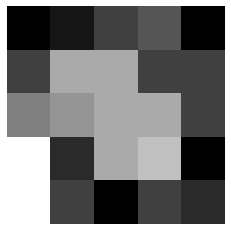

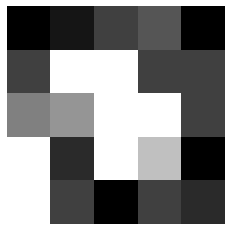

In [309]:
# Given an image, coord, and new pixel value, replace pixel of all neighbors of coord with same value
def flood_fill(image, coord, new):
    from collections import deque
    queue = deque([coord])
    visited = set([coord])
    i, j = coord
    orig = image[i][j]
    image[i][j] = new
    while len(queue) > 0:
        current = queue.popleft()
        for neighbor in get_neighbors(image, current):
            ii, jj = neighbor
            if neighbor not in visited and image[ii][jj] == orig:
                visited.add(neighbor)
                queue.append(neighbor)
                image[ii][jj] = new
    return image

image = [[0,1,3,4,0],
         [3,8,8,3,3],
         [6,7,8,8,3],
         [12,2,8,9,0],
         [12,3,0,3,2]]
plt.imshow(image, cmap='gray'); plt.axis('off'); plt.show()
new_image = flood_fill(image, (1, 2), 12)
plt.imshow(new_image, cmap='gray'); plt.axis('off'); plt.show()

## Dynamic Programming

- Dynamic Programming (DP) = DFS + Memoization + Pruning
- DP can be thought of as DFS on the subproblem graph, where pruning and memoization is used to truncate the graph.
- Important: When doing DP, explicitly define what the subproblems are, e.g. 
$$f(i) = \max \text{ score}\big(x[i:]\big) \quad ,\forall i=n,n-1,\cdots,1.$$
- The natural subproblems to try are:
    - Prefixes $x[:i]$, which run in $O(n)$ time
    - Suffixes $x[i:]$, which run in $O(n)$ time
    - Substrings $x[i:j]$, which run in $O(n^2)$ time
- For problems with multiple inputs (e.g. LCS) use the natural subproblems on *each input* individually, then combine.
- Template:

```python

memo = {}
def f(x):
    if x in memo:
        return memo[x]
    elif x is a base case:
        memo[x] = f(x)
        return memo[x]
    else:
        f(x) = max(f(x[next:]), f(x), ...)
        memo[x] = f(x)
```

## Miscellaneous

### Intervals

- Two closed intervals $[a_1,b_1], [a_2, b_2]$ overlap if $\max(a_1, a_2) \leq \min(b_1, b_2)$, or equivalently if both $b_2 \geq a_1$ and $b_1 \geq a_2$.

<img src=https://algomonster.s3.us-east-2.amazonaws.com/interval_pattern_intro.png width=400>

In [463]:
# Given a collection of intervals, merge all overlapping intervals
# Example: [[1,3],[2,6],[8,10],[15,18]] -> [[1,6],[8,10],[15,18]]
def merge_intervals(intervals):
    # time O(n*log(n)), space O(1)
    overlap = lambda int_1, int_2: not (int_2[1] < int_1[0] or int_1[1] < int_2[0])
    intervals.sort()
    merged = []
    for interval in intervals:
        if len(merged) == 0 or not overlap(merged[-1], interval):
            merged.append(interval)
        else:
            merged[-1][1] = max(merged[-1][1], interval[1])
    return merged

merge_intervals([[2, 10], [5, 8], [3, 4], [10, 15]])

[[2, 15]]

### Tries

- A **trie** is a tree used to store strings in a way that allow efficient prefix search and string insertions.
- The root of the tree is a base "empty" token, represented here by `$`.
- Each path through the tree is one of the strings stored in the trie.

<img src=https://algomonster.s3.us-east-2.amazonaws.com/trie_intro/trie_intro.003.png width=600>

In [426]:
class TrieNode:
    def __init__(self, value='$'):
        self.value = value
        self.children = {}
        self.freq = 0

    def insert(self, string, idx=0):
        self.freq += 1
        if idx < len(string):
            if string[idx] not in self.children:
                self.children[string[idx]] = TrieNode(string[idx])
            self.children[string[idx]].insert(string, idx=idx+1)
                
    def query(self, prefix, idx=0):
        # this function will vary depending on the task
        # we have reached end of prefix, terminate by returning the value
        if len(prefix) == idx:
            return self.freq
        # go to the children if it exists
        if prefix[idx] in self.children:
            return self.children[prefix[idx]].query(prefix, idx=idx+1)
        # if character not in children then our dictionary does not have prefix and return 0
        else:
            return 0
        
    def __repr__(self):
        return f'TrieNode({self.value}, children={[self.children[node] for node in self.children]})'
    
    def print_tree(self, level=0):
        indent = '   '
        if self is not None:
            current_level = level
            print(f'{indent * current_level} {self.value}')
            for child in self.children:
                self.children[child].print_tree(current_level + 1)

            
node = TrieNode('$')
node.insert('dog')
node.insert('dock')
node.insert('cat')
node.insert('cap')
node.print_tree()

 $
    d
       o
          g
          c
             k
    c
       a
          t
          p


In [427]:
def prefix_count(words, prefixes):
    root = TrieNode()
    for word in words:
        root.insert(word)
    counts = []
    for prefix in prefixes:
        counts.append(root.query(prefix))
    return counts

prefix_count(["forgot", "for", "algomonster", "while"], ["fo", "forg", "algo"])

[2, 1, 1]

### LRU Cache

Design and implement a data structure for Least Recently Used (LRU) cache. It should support get and put operations.
- `get(key)`: Get the value (which will always be positive) of the key if the key exists in the cache, otherwise return -1.
- `put(key, value)`: Set or insert the value if the key is not already present. When the cache reached its capacity, it should invalidate the least recently used item before inserting a new item.

The cache is initialized with a positive capacity.

In [437]:
class LRUCache:
    def __init__(self, capacity):
        from collections import deque
        self.capacity = capacity
        self.cache = {}
        self.queue = deque([])
    
    def get(self, key):
        # O(n) time (due to the remove)
        if key in self.cache:
            value = self.cache[key]
            # move (key, value) to the top of the queue again
            self.queue.remove((key, value))
            self.queue.append((key, value))
            return value
        else:
            return -1
    
    def put(self, key, value):
        # O(1) time
        self.cache[key] = value
        self.queue.append((key, value))
        while len(self.cache) > self.capacity:
            # pop off least recently used
            least_key, _ = self.queue.popleft()
            self.cache.pop(least_key)
        
    def __repr__(self):
        return str(self.cache)
        
cache = LRUCache(2)
cache.put(1, 1)
cache.put(2, 2)
print(cache.get(1))
cache.put(3, 3)
print(cache.get(2))
cache.put(4, 4)
print(cache.get(1))
print(cache.get(3))
print(cache.get(4))
cache

1
-1
-1
3
4


{3: 3, 4: 4}